# Bike Sharing Assignment

## Bike Sharing System:
* A bike-sharing system in which bikes are made available for shared use to individuals on a short term basis for a price or free. 
* It allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. 
* This bike can then be returned to another dock belonging to the same system.

## Business Objective:
* The objective is to model the demand for shared bikes with the available independent variables. 
* It will be used by the management to understand how exactly the demands vary with different features. 
* They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. 
* Further, the model will be a good way for management to understand the demand dynamics of a new market.

## Objective of the Assignment:
* Creating a linear model that describe the effect of various features on demand.
* The model should be interpretable so that the management can understand it.


## Reading and Understanding the Data:

### Importing the necessary libraries:

In [286]:
import numpy as np                                   # Numpy Library
import pandas as pd                                  # Pandas Library
import seaborn as sns                                # Seaborn library for Data visualization
import matplotlib.pyplot as plt                      # Matplot library for Data visualization
import warnings
warnings.simplefilter('ignore')                       # Ignore the unnecessary warnings

import sklearn                                        # Scikit library

from sklearn.model_selection import train_test_split  # Used to split the dataset into test and train datasets
from sklearn.preprocessing import MinMaxScaler        # Used for scaling the data
from sklearn.feature_selection import RFE             # Used to compute RFE (Recursive Feature Elimination)
from sklearn.linear_model import LinearRegression     # Used to compute Linear Regression

import statsmodels.api as sm                          # Used to add constants and create linear models

from statsmodels.stats.outliers_influence import variance_inflation_factor   # Used to compute VIF (Variance Inflation Factor)

from sklearn.metrics import r2_score  # To Compute R squared values

In [287]:
# Reading the Dataset:
bike_sharing = pd.read_csv(r"C:\Users\Suhas Satheesh\Desktop\Bike Sharing\day.csv")
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [288]:
#Shape of the Data frame
bike_sharing.shape

(730, 16)

In [289]:
# So, there are 730 rows and 16 columns in the data set.

In [290]:
#Descriptive Insights of the Data Frame
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [291]:
#Description of Data Frame
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Quality Checks:

In [292]:
#Checking for Null values in the data set
bike_sharing.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [293]:
# So, there are no null values found.

In [294]:
# Checking for Duplicates in the dataset
bike_sharing.duplicated().sum()

0

In [295]:
# No duplicates found in the dataset.

### Data Cleaning:

In [296]:
# Removal of Unwanted Columns:

In [297]:
#Columns in Data Frame
bike_sharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [298]:
# Dropping of columns - 'instant','dteday','casual','registered','atemp'
bike_sharing.drop(['instant', 'dteday','casual','registered'], axis=1, inplace=True)

In [299]:
# Checking the Shape of the dataset after dropping the columns
bike_sharing.shape

(730, 12)

In [300]:
# So now we have 730 rows and 11 columns. The above 5 columns have been dropped.

### Identifying Categorical and Numerical Variables in the Dataset:

In [301]:
# Identifying the Categorical Variable:
categorical_variables = ['season','yr','mnth','holiday','weekday', 'workingday','weathersit']

In [302]:
# convert dtype of categorical variables
bike_sharing[categorical_variables] = bike_sharing[categorical_variables].astype('category')

In [303]:
# Identifying the Numerical Variables:
numeric_variables = ['temp','atemp', 'hum','windspeed','cnt']

In [304]:
# Description of Categorical Variables
bike_sharing[categorical_variables].describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit
count,730,730,730,730,730,730,730
unique,4,2,12,2,7,2,3
top,3,0,1,0,0,1,1
freq,188,365,62,709,105,499,463


In [305]:
# Description of Numeric Variables
bike_sharing[numeric_variables].describe()

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


### Treating the Columns according to the description in Data Dictionary:
### Handling the Categorical Variables:

#### Description According to Data Dictionary:
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	

In [306]:
# Treating the "season" column

In [307]:
# Checking the counts of season column
bike_sharing.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [308]:
# Assigning the Values with the Description according to the Data Dictionary
def ass_season(x):
    if x == 1:
        return "spring"
    elif x == 2:
        return "summer"
    elif x ==3:
        return "fall"
    elif x == 4:
        return "winter"

In [309]:
bike_sharing.season = bike_sharing.season.apply(ass_season)

In [310]:
# Checking the updated season column
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [311]:
bike_sharing.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [312]:
# Treating the "mnth" column

In [313]:
# Checking the counts of values in mnth column
bike_sharing.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [314]:
# Assigning the values of mnth column with Description
def ass_mnth(x):
    if x == 1:
        return "January"
    if x == 2:
        return "Febraury"
    if x == 3:
        return "March"
    if x == 4:
        return "April"
    if x == 5:
        return "May"
    if x == 6:
        return "June"
    if x == 7:
        return "July"
    if x == 8:
        return "August"
    if x == 9:
        return "September"
    if x == 10:
        return "October"
    if x == 11:
        return "November"
    if x == 12:
        return "December"

In [315]:
bike_sharing.mnth = bike_sharing.mnth.apply(ass_mnth)

In [316]:
# Viewing the updated mnth column
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [317]:
bike_sharing.mnth.value_counts()

January      62
March        62
May          62
July         62
August       62
October      62
December     62
April        60
June         60
September    60
November     60
Febraury     56
Name: mnth, dtype: int64

In [318]:
# Treating the "weekday" column

In [319]:
# Checking the counts of values in "weekday" column
bike_sharing.weekday.value_counts()

0    105
1    105
6    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [320]:
# Assigning the values with description
def ass_weekday(x):
    if x == 0:
        return "Sunday"
    if x == 1:
        return "Monday"
    if x == 2:
        return "Tuesday"
    if x == 3:
        return "Wednesday"
    if x == 4:
        return "Thursday"
    if x == 5:
        return "Friday"
    if x == 6:
        return "Saturday"

In [321]:
bike_sharing.weekday = bike_sharing.weekday.apply(ass_weekday)

In [322]:
# Viewing the columns of "weekday"
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Saturday,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [323]:
bike_sharing.weekday.value_counts()

Sunday       105
Monday       105
Saturday     105
Tuesday      104
Thursday     104
Friday       104
Wednesday    103
Name: weekday, dtype: int64

In [324]:
# Treating the "weathersit" column

In [325]:
# Checking the count of values of "weathersit" column
bike_sharing.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [326]:
# Assigning the values with Description
def ass_weathersit(x):
    if x == 1:
        return "Clear_FewClouds"
    if x == 2:
        return "Mist_Cloudy"
    if x == 3:
        return "LightSnow_LightRain"
    if x == 4:
        return "HeavyRain_IcePallets"

In [327]:
bike_sharing.weathersit = bike_sharing.weathersit.apply(ass_weathersit)

In [328]:
# Viewing the weathersit column after assigning description
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Saturday,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,Clear_FewClouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,Clear_FewClouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,Clear_FewClouds,9.305237,11.46350,43.6957,12.522300,1600


In [329]:
bike_sharing.weathersit.value_counts()

Clear_FewClouds        463
Mist_Cloudy            246
LightSnow_LightRain     21
Name: weathersit, dtype: int64

### Creating Dummy Variables:

In [330]:
# Information about dataset
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 35.1 KB


In [331]:
# Creating Dummy Variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'.

In [332]:
bike_sharing_wd = pd.get_dummies(bike_sharing, drop_first=True) # bike_sharing_wd =  bike_sharing dataset with dummy variables
bike_sharing_wd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   temp                            730 non-null    float64
 1   atemp                           730 non-null    float64
 2   hum                             730 non-null    float64
 3   windspeed                       730 non-null    float64
 4   cnt                             730 non-null    int64  
 5   season_summer                   730 non-null    uint8  
 6   season_fall                     730 non-null    uint8  
 7   season_winter                   730 non-null    uint8  
 8   yr_1                            730 non-null    uint8  
 9   mnth_Febraury                   730 non-null    uint8  
 10  mnth_March                      730 non-null    uint8  
 11  mnth_April                      730 non-null    uint8  
 12  mnth_May                        730 

In [333]:
bike_sharing_wd.shape

(730, 30)

## Splitting the data:


### Splitting the data to Train and Test: 
* Splitting the data into TRAIN and TEST (70:30 ratio).

* We make use of train_test_split method from sklearn package for this.

In [334]:
# We should specify 'random_state' so that the train and test data set always have the same rows, respectively
# df_train is the training dataframe, and df_test is the testing dataframe
np.random.seed(0)
df_train, df_test = train_test_split(bike_sharing_wd, train_size = 0.70, test_size = 0.30, random_state = 333)

In [335]:
# Verifying the info and shape of the dataframes after split:

In [336]:
df_train.shape

(510, 30)

In [337]:
# 70% ratio of data set is considered for training dataset i.e., with 510 rows and 29 columns

In [338]:
df_train.info

<bound method DataFrame.info of           temp     atemp      hum  windspeed   cnt  season_summer  \
483  18.791653  22.50605  58.7083   7.832836  6304              1   
650  16.126653  19.56980  49.4583   9.791514  7109              0   
212  31.638347  35.16460  55.0833  10.500039  4266              0   
714  14.862500  18.49690  83.8750   6.749714  3786              0   
8     5.671653   5.80875  43.4167  24.250650   822              0   
..         ...       ...      ...        ...   ...            ...   
467  18.142500  21.59040  40.8333  10.416557  6398              1   
444  21.798347  25.66290  82.1250   6.000406  6230              1   
46   13.048701  15.81000  42.3478  16.869997  2115              0   
374  12.656536  15.94130  64.6522  12.565984  3598              0   
366  11.194763  12.61520  38.1304  22.087555  1951              0   

     season_fall  season_winter  yr_1  mnth_Febraury  ...  holiday_1  \
483            0              0     1              0  ...          

In [339]:
df_test.shape

(219, 30)

In [340]:
# 30% ratio of data set is considered for training dataset i.e., with 219 rows and 29 columns

In [341]:
df_test.info

<bound method DataFrame.info of           temp      atemp      hum  windspeed   cnt  season_summer  \
22    3.957390   4.941955  43.6522  16.522200   986              0   
468  20.295000  24.399800  50.2917  12.791439  7460              1   
553  33.722500  39.519800  57.3750   8.417143  4672              0   
504  25.454153  29.198350  53.0417  17.042589  7129              1   
353  15.819153  19.822700  59.5417   4.125244  3750              0   
..         ...        ...      ...        ...   ...            ...   
237  28.700000  32.986650  76.1250   5.625488  4661              0   
611  29.759153  34.344400  75.5000  15.833507  6864              0   
258  19.235847  23.073750  59.0417  11.000261  4760              0   
518  24.702500  28.756650  49.3333  12.333829  7641              1   
313  15.580000  18.686050  81.3333  12.667489  2933              0   

     season_fall  season_winter  yr_1  mnth_Febraury  ...  holiday_1  \
22             0              0     0              0  .

## Exploratory Data Analysis:

In [342]:
# Training Dataset info:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   temp                            510 non-null    float64
 1   atemp                           510 non-null    float64
 2   hum                             510 non-null    float64
 3   windspeed                       510 non-null    float64
 4   cnt                             510 non-null    int64  
 5   season_summer                   510 non-null    uint8  
 6   season_fall                     510 non-null    uint8  
 7   season_winter                   510 non-null    uint8  
 8   yr_1                            510 non-null    uint8  
 9   mnth_Febraury                   510 non-null    uint8  
 10  mnth_March                      510 non-null    uint8  
 11  mnth_April                      510 non-null    uint8  
 12  mnth_May                        51

In [343]:
# Checking the columns of train dataset
df_train.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'season_summer',
       'season_fall', 'season_winter', 'yr_1', 'mnth_Febraury', 'mnth_March',
       'mnth_April', 'mnth_May', 'mnth_June', 'mnth_July', 'mnth_August',
       'mnth_September', 'mnth_October', 'mnth_November', 'mnth_December',
       'holiday_1', 'weekday_Monday', 'weekday_Tuesday', 'weekday_Wednesday',
       'weekday_Thursday', 'weekday_Friday', 'weekday_Saturday',
       'workingday_1', 'weathersit_Mist_Cloudy',
       'weathersit_LightSnow_LightRain'],
      dtype='object')

### Data Visualization of Numeric Columns:

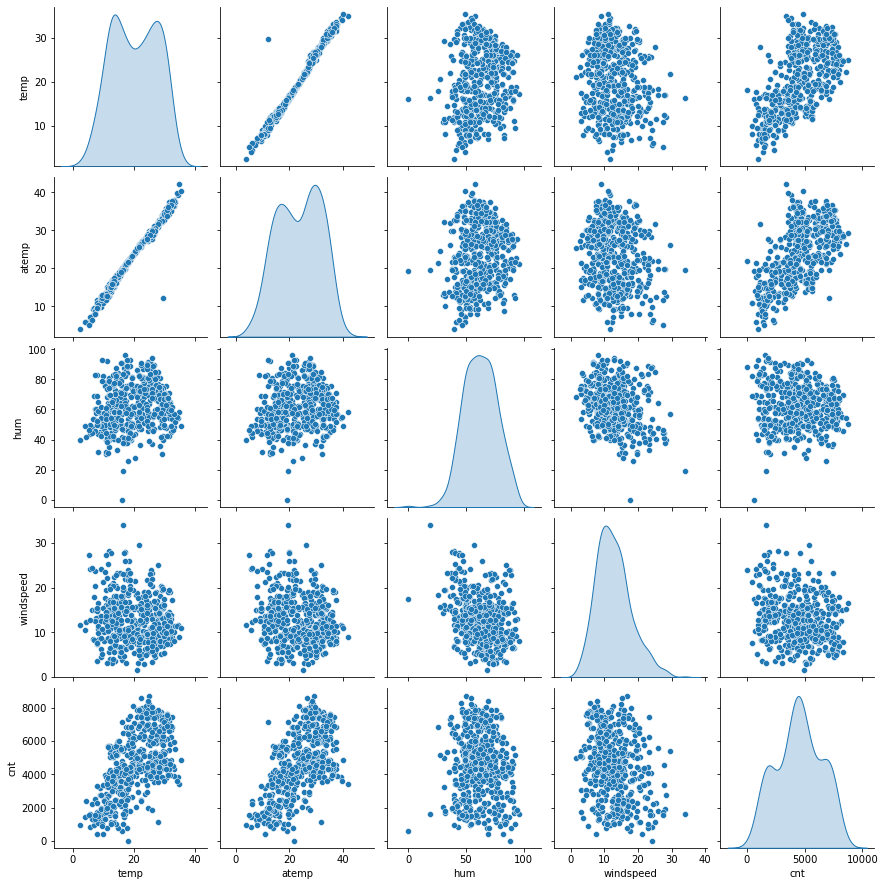

In [344]:
numeric_variables = df_train[['temp', 'atemp', 'hum','windspeed','cnt']]
sns.pairplot(numeric_variables, diag_kind='kde')
plt.show()

### Observation:
* The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp'.
* Columns "hum" and "windspeed" columns are normally distributed.
* It is observed that the target variable 'cnt' has highest correlation with temp and atemp.

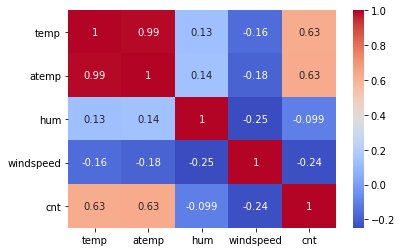

In [345]:
# Correaltion between Numeric varibales using heat map
sns.heatmap(bike_sharing.corr(), annot=True, cmap='coolwarm')
plt.show()

- A positive correalation observed between cnt and temp (0.63)
- A Negative correlation observed for cnt with hum and windspeed (-0.099 and -0.24)

### Data Visuslization of Categorical variables:

#### Visualization of categorical variables (before creating dummies) againt the dependant variable 'cnt'  to see how each of the predictor variable stackup against the target/dependant variable.

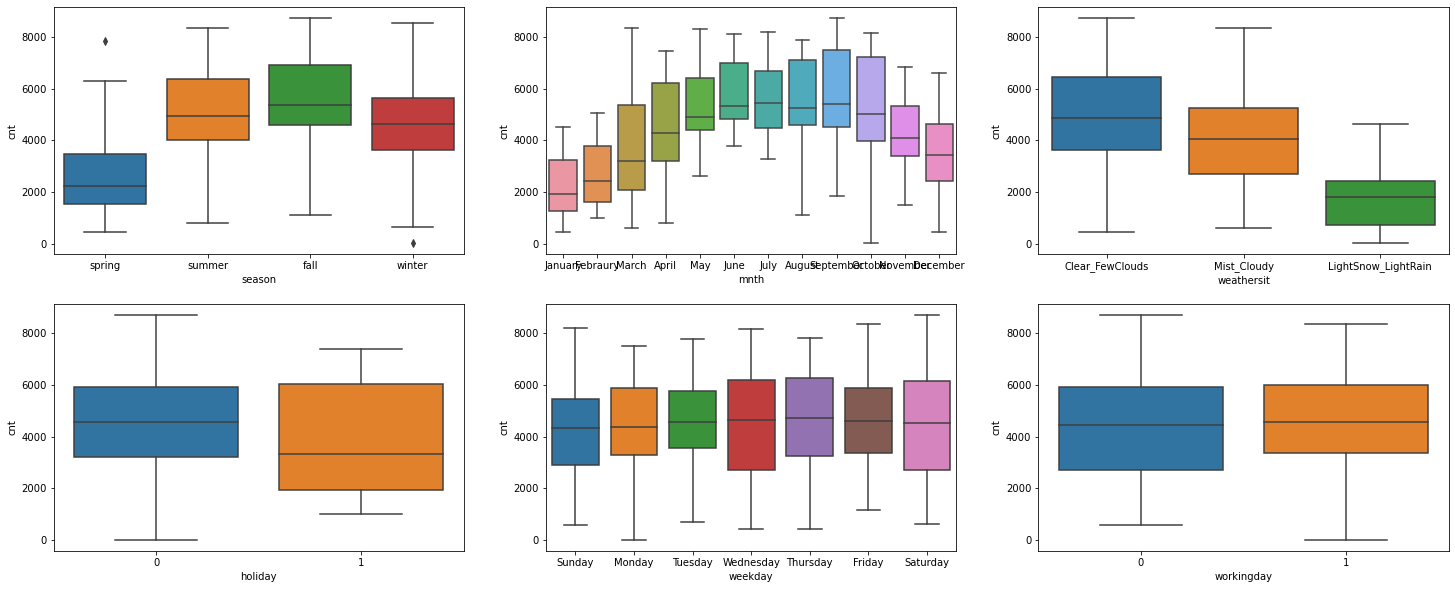

In [346]:
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing)
plt.show()

## Observations:
From season vs cnt, 
- It is observed that the count of total rental bikes is more in fall season and least in spring season. 
- In fall a median of over 5000 total rental bikes bookings is observed.

From mnth vs cnt,
- It is observed that the booking are more in the month of September which is approximately over 7000 amd has a median count of around 5000. January has the least amount of bookings somewhere over 3000.

From weathersit vs cnt,
- It is observed that the bookings are high during Clear, Few clouds, Partly cloudy, Partly cloudy weather with over 6000 bookings with a median of around 5000. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds weather has the least number of bookings.

From holiday vs cnt,
- It is observed that the maximum amount of bookings on holidays and non holidays seems to be same, which is around 6000. But the median is more on non-holidays which is over 4000. So comparatively, bookings are more on non-holidays.

From weekday vs cnt,
- It is observed that the bookings are more on weekdays. More bookings happened on Wednesdays and Thursday and least being on Sunday.

From workingday vs cnt,
- It is observed that the median is almost the same for both working and non-working day which is over 4000 bookings. But the probability of customers booking is observed more on working days.

### Visualizing Numeric Variables with Target Variable:

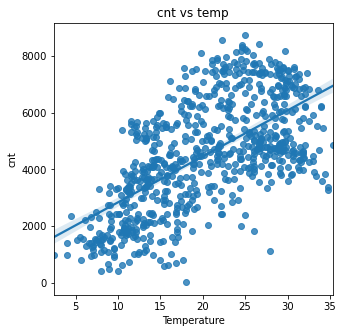

In [348]:
#Visualizing with variable - temp
plt.figure(figsize=(5,5))
plt.title('cnt vs temp')
sns.regplot(data=bike_sharing, y='cnt', x='temp')
plt.xlabel('Temperature')
plt.show()

#### Obesrvation:
* Demand is positively correlated to the variable temp.
* Also, we can see that there is a linear relationship between cnt and temp.

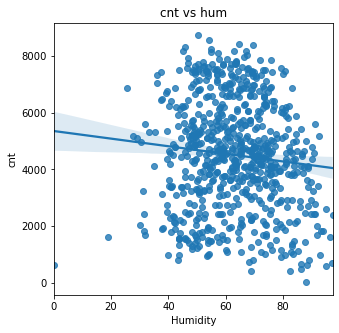

In [349]:
# Visualizing with variable - hum
plt.figure(figsize=(5,5))
plt.title('cnt vs hum')
sns.regplot(data=bike_sharing, y='cnt', x='hum')
plt.xlabel('Humidity')
plt.show()

#### Obesrvation:
* Here, the values are more scattered.
* Also, we can see cnt is decreasing with increase in humidity.

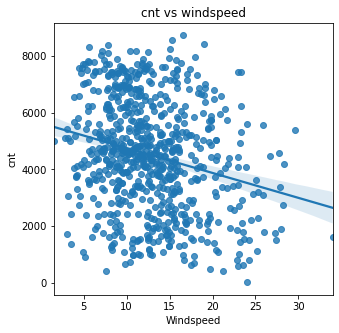

In [350]:
# Visualizing with variable - windspeed
plt.figure(figsize=(5,5))
plt.title('cnt vs windspeed')
sns.regplot(data=bike_sharing, y='cnt', x='windspeed')
plt.xlabel('Windspeed')
plt.show()

#### Observation:
* Here, the values are more scattered.
* Also, we can see cnt is decreasing with increase in windspeed.

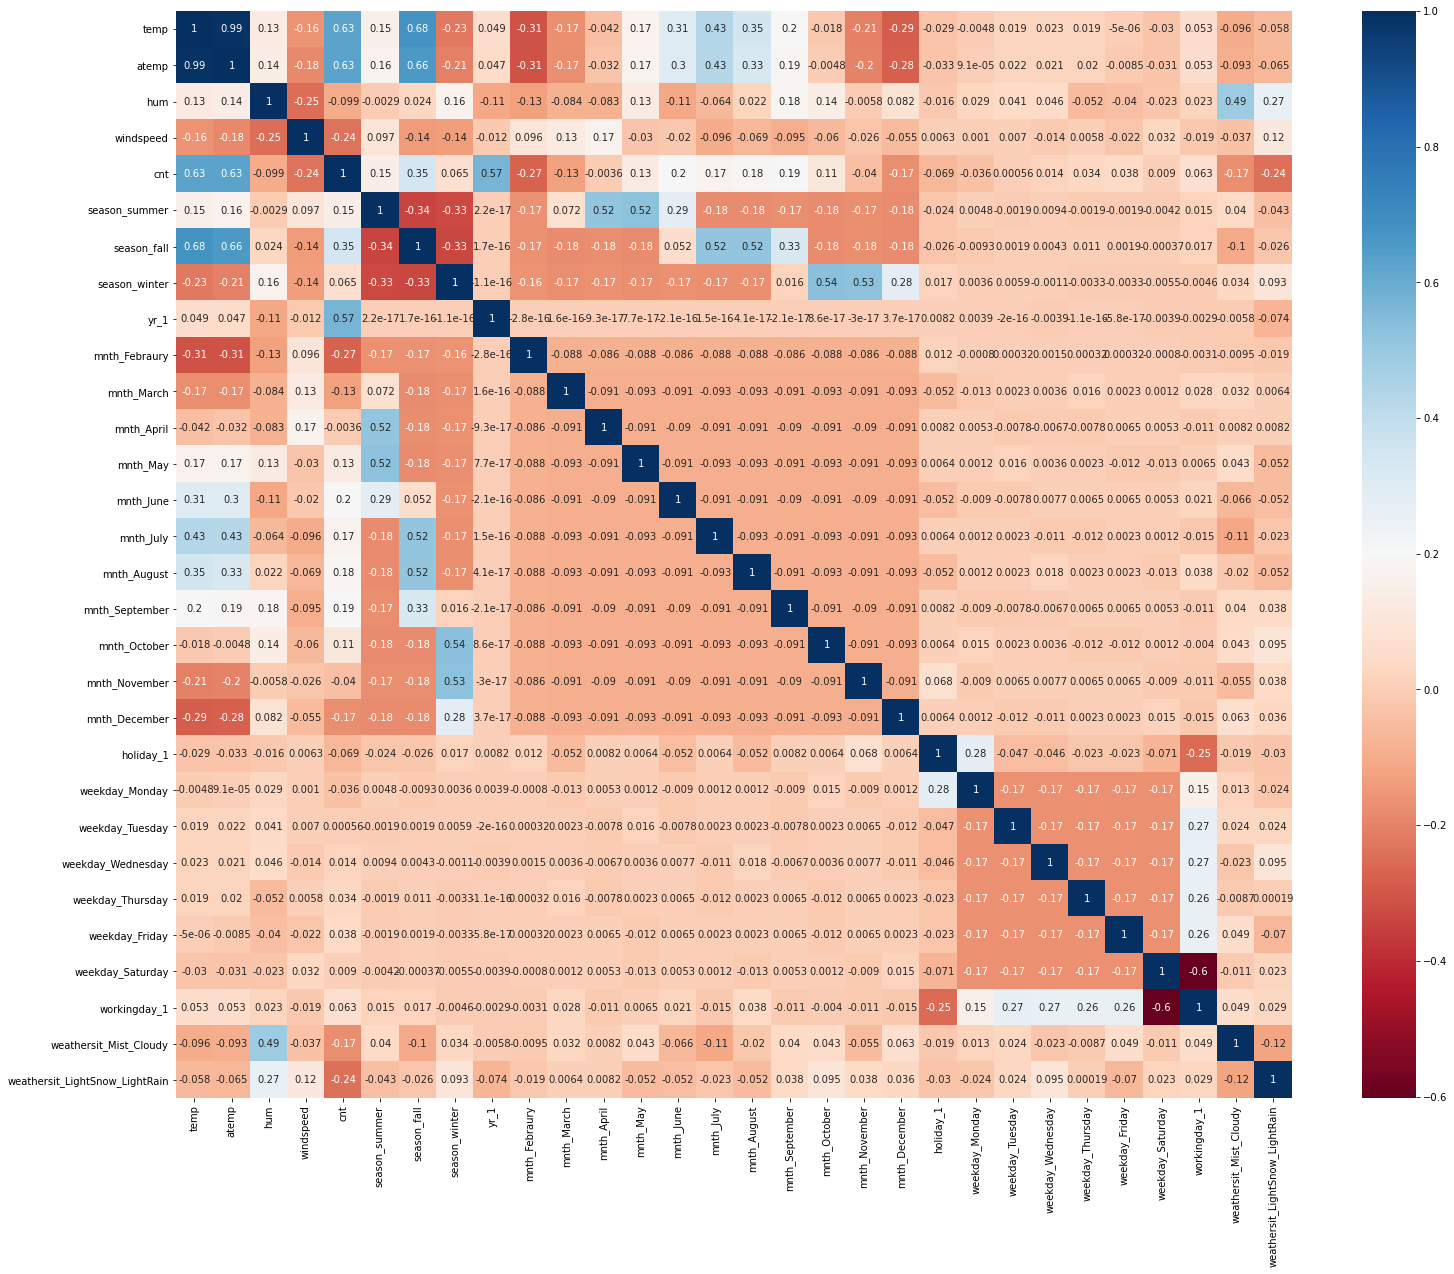

In [351]:
### Correlation Matrix:
# Checking the correlation coefficients to see which variables are highly correlated. bike_sharing dataset with dummies i.e., bike_sharing_wd is used
plt.figure(figsize = (25,20))
sns.heatmap(bike_sharing_wd.corr(), annot = True, cmap="RdBu")
plt.show()

- The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable - cnt.
- It is important to build the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

### Rescaling the Features:

In [352]:
scaler = MinMaxScaler() #scaling each feature to a given range

In [353]:
# Checking the values of train dataset before scaling
df_train.head()

,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,season_winter,yr_1,mnth_Febraury,...,holiday_1,weekday_Monday,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,workingday_1,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
483,18.791653,22.50605,58.7083,7.832836,6304,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
650,16.126653,19.56980,49.4583,9.791514,7109,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
212,31.638347,35.16460,55.0833,10.500039,4266,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
714,14.862500,18.49690,83.8750,6.749714,3786,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
8,5.671653,5.80875,43.4167,24.250650,822,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [354]:
df_train.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'season_summer',
       'season_fall', 'season_winter', 'yr_1', 'mnth_Febraury', 'mnth_March',
       'mnth_April', 'mnth_May', 'mnth_June', 'mnth_July', 'mnth_August',
       'mnth_September', 'mnth_October', 'mnth_November', 'mnth_December',
       'holiday_1', 'weekday_Monday', 'weekday_Tuesday', 'weekday_Wednesday',
       'weekday_Thursday', 'weekday_Friday', 'weekday_Saturday',
       'workingday_1', 'weathersit_Mist_Cloudy',
       'weathersit_LightSnow_LightRain'],
      dtype='object')

In [355]:
# Applying scaler() to all the numeric variables
numeric_variables = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_train[numeric_variables] = scaler.fit_transform(df_train[numeric_variables])

In [356]:
# Checking values after scaling
df_train.head()

,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,season_winter,yr_1,mnth_Febraury,...,holiday_1,weekday_Monday,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,workingday_1,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
483,0.497426,0.487055,0.609956,0.194850,0.722734,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
650,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
212,0.887856,0.819376,0.572294,0.276919,0.488265,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
714,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
8,0.098690,0.048706,0.451083,0.700017,0.092039,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [357]:
df_train.describe()

,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,season_winter,yr_1,mnth_Febraury,...,holiday_1,weekday_Monday,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,workingday_1,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.540901,0.515631,0.647390,0.346318,0.515144,0.247059,0.262745,0.241176,0.501961,0.082353,...,0.023529,0.139216,0.141176,0.150980,0.129412,0.145098,0.150980,0.682353,0.341176,0.025490
std,0.227898,0.213626,0.149722,0.160266,0.224281,0.431725,0.440557,0.428217,0.500487,0.275172,...,0.151726,0.346511,0.348545,0.358381,0.335985,0.352545,0.358381,0.466018,0.474570,0.157763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.343228,0.335807,0.536147,0.230784,0.359468,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.540519,0.525578,0.646367,0.325635,0.516337,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.740406,0.692378,0.757900,0.434287,0.685861,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Building a Linear Model:

### RFE (Recursive feature elimination):
LinearRegression function is used from SciKit Learn to check its compatibility with RFE.

### Dividing into X and Y sets for the model building:

In [358]:
y_train = df_train.pop('cnt')     # Popping out the target variable "cnt"
X_train = df_train

In [359]:
# Variable Selection using RFE

In [360]:
# Running RFE with the output number of the variable equal to 15

In [361]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [362]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_summer', True, 1),
 ('season_fall', True, 1),
 ('season_winter', True, 1),
 ('yr_1', True, 1),
 ('mnth_Febraury', False, 7),
 ('mnth_March', True, 1),
 ('mnth_April', False, 3),
 ('mnth_May', False, 2),
 ('mnth_June', False, 4),
 ('mnth_July', False, 15),
 ('mnth_August', False, 5),
 ('mnth_September', True, 1),
 ('mnth_October', True, 1),
 ('mnth_November', False, 8),
 ('mnth_December', False, 9),
 ('holiday_1', False, 14),
 ('weekday_Monday', False, 6),
 ('weekday_Tuesday', False, 13),
 ('weekday_Wednesday', False, 11),
 ('weekday_Thursday', False, 12),
 ('weekday_Friday', False, 10),
 ('weekday_Saturday', True, 1),
 ('workingday_1', True, 1),
 ('weathersit_Mist_Cloudy', True, 1),
 ('weathersit_LightSnow_LightRain', True, 1)]

In [363]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'atemp', 'hum', 'windspeed', 'season_summer', 'season_fall',
       'season_winter', 'yr_1', 'mnth_March', 'mnth_September', 'mnth_October',
       'weekday_Saturday', 'workingday_1', 'weathersit_Mist_Cloudy',
       'weathersit_LightSnow_LightRain'],
      dtype='object')

In [364]:
X_train.columns[~rfe.support_]

Index(['mnth_Febraury', 'mnth_April', 'mnth_May', 'mnth_June', 'mnth_July',
       'mnth_August', 'mnth_November', 'mnth_December', 'holiday_1',
       'weekday_Monday', 'weekday_Tuesday', 'weekday_Wednesday',
       'weekday_Thursday', 'weekday_Friday'],
      dtype='object')

In [365]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Building Linear Model using Stats Model:

In [366]:
# Checking VIF
# from statsmodels.stats.outliers_influence import variance_inflation_factor  --> Importing VIF from stats model

In [367]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,384.22
1,atemp,363.12
2,hum,17.52
5,season_fall,7.09
3,windspeed,4.71
12,workingday_1,4.61
4,season_summer,3.54
6,season_winter,3.01
13,weathersit_Mist_Cloudy,2.14
7,yr_1,2.02


In [368]:
# We Observe that temp is having VIF Value 384.22 and atemp with VIF value of 363.12 which are the highest.

In [369]:
# import statsmodels.api as sm ---> provides classes and functions for the estimation of many different statistical models

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit() # Creation of Linear Model 1 (lr1)

In [370]:
# Check the parameters obtained from lr1 model

lr1.params

const                             0.195340
temp                              0.433878
atemp                             0.058635
hum                              -0.178382
windspeed                        -0.184925
season_summer                     0.130228
season_fall                       0.079599
season_winter                     0.153475
yr_1                              0.228741
mnth_March                        0.047149
mnth_September                    0.100017
mnth_October                      0.054370
weekday_Saturday                  0.054618
workingday_1                      0.040787
weathersit_Mist_Cloudy           -0.047472
weathersit_LightSnow_LightRain   -0.271174
dtype: float64

In [371]:
# Printing a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.1
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.28e-186
Time:                        11:03:59   Log-Likelihood:                 509.26
No. Observations:                 510   AIC:                            -986.5
Df Residuals:                     494   BIC:                            -918.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

### Observation:
- temp and atemp have the highest p-value and VIF
- It is beneficial if we drop atemp variable for building model.
- Though temp has high p-value and VIF, it is required to analyze the model in further steps as "cnt" variable may be dependant on it.

In [372]:
# Dropping the "atemp" variable having highest p-value and VIF value
X_train = X_train_rfe.drop(["atemp"], axis = 1)

In [373]:
# Rechecking the VIF values of variables
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,23.21
1,hum,17.23
4,season_fall,7.01
11,workingday_1,4.60
2,windspeed,4.55
3,season_summer,3.54
5,season_winter,3.01
12,weathersit_Mist_Cloudy,2.14
6,yr_1,2.02
10,weekday_Saturday,1.79


In [374]:
# It is observed that "hum" has the highest VIF value of 17.23 (temp is ignored as it is required for further analysis)

In [375]:
# Add a constant for linear model2
X_train_lm2 = sm.add_constant(X_train)

# Create a linear model
lr2 = sm.OLS(y_train, X_train_lm2).fit()  # Creation of Linear Model 2 (lr2)

In [376]:
# Check the parameters obtained

lr2.params

const                             0.196221
temp                              0.489280
hum                              -0.177805
windspeed                        -0.187198
season_summer                     0.130352
season_fall                       0.078664
season_winter                     0.153732
yr_1                              0.228723
mnth_March                        0.047295
mnth_September                    0.100029
mnth_October                      0.054438
weekday_Saturday                  0.054705
workingday_1                      0.040773
weathersit_Mist_Cloudy           -0.047620
weathersit_LightSnow_LightRain   -0.271535
dtype: float64

In [377]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.9
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.00e-187
Time:                        11:04:02   Log-Likelihood:                 509.17
No. Observations:                 510   AIC:                            -988.3
Df Residuals:                     495   BIC:                            -924.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

### Observations:
- Since "hum" variable has the higher VIF value, it is preferred to be removed. (As stated earlier, temp is ignored as it is required for further analysis though having highest VIF value)

In [378]:
# Removing "hum" variable
X_train = X_train.drop(["hum"], axis = 1)

In [379]:
# Checking the VIF Values again
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,16.81
3,season_fall,6.75
1,windspeed,4.27
10,workingday_1,4.11
2,season_summer,3.51
4,season_winter,2.89
5,yr_1,2.02
8,mnth_October,1.66
9,weekday_Saturday,1.66
11,weathersit_Mist_Cloudy,1.54


In [380]:
# It is observed that season_fall has the highest VIF value after "temp"

In [381]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()  # Creation third linear model (lr3)

In [382]:
# Checking the parameters of linear regression model
lr3.params

const                             0.091594
temp                              0.456709
windspeed                        -0.148815
season_summer                     0.131914
season_fall                       0.087922
season_winter                     0.150243
yr_1                              0.233129
mnth_March                        0.055303
mnth_September                    0.091371
mnth_October                      0.053320
weekday_Saturday                  0.055451
workingday_1                      0.042443
weathersit_Mist_Cloudy           -0.077149
weathersit_LightSnow_LightRain   -0.324223
dtype: float64

In [383]:
# Removing season_fall having the higher VIF value
X_train = X_train.drop(["season_fall"], axis = 1)

In [384]:
# Checking the VIF values of variables after removal of season_fall
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,4.92
1,windspeed,4.15
9,workingday_1,4.07
4,yr_1,2.01
3,season_winter,1.98
8,weekday_Saturday,1.66
7,mnth_October,1.63
2,season_summer,1.56
10,weathersit_Mist_Cloudy,1.54
6,mnth_September,1.23


In [385]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train)

# Create a fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit() #Creation of Linear regression model 4 (lr4)

In [386]:
# Check the parameters obtained for linear model 4

lr4.params

const                             0.076726
temp                              0.568327
windspeed                        -0.153306
season_summer                     0.083704
season_winter                     0.119733
yr_1                              0.231340
mnth_March                        0.044132
mnth_September                    0.102838
mnth_October                      0.041927
weekday_Saturday                  0.056942
workingday_1                      0.042231
weathersit_Mist_Cloudy           -0.077340
weathersit_LightSnow_LightRain   -0.316638
dtype: float64

In [387]:
# Print a summary of the linear regression model 4 obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     200.2
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.56e-181
Time:                        11:04:08   Log-Likelihood:                 488.92
No. Observations:                 510   AIC:                            -951.8
Df Residuals:                     497   BIC:                            -896.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

### Observation:
- From comparison of P-values and VIF values of all variables, mnth_October is having high p-value and high VIF value and needs to be removed for building a better model.

In [388]:
# Removing mnth_october
X_train = X_train.drop(["mnth_October"], axis = 1)

In [389]:
# Checking the VIF values again after removal of mnth_October
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,4.80
1,windspeed,4.11
8,workingday_1,4.07
4,yr_1,2.00
7,weekday_Saturday,1.66
2,season_summer,1.56
9,weathersit_Mist_Cloudy,1.53
3,season_winter,1.41
6,mnth_September,1.20
5,mnth_March,1.15


In [390]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit() #Creation of Linear model 5 (lr5)

In [391]:
# Check the parameters obtained

lr5.params

const                             0.074194
temp                              0.575607
windspeed                        -0.156154
season_summer                     0.082553
season_winter                     0.134820
yr_1                              0.230191
mnth_March                        0.044834
mnth_September                    0.096439
weekday_Saturday                  0.057422
workingday_1                      0.042294
weathersit_Mist_Cloudy           -0.075711
weathersit_LightSnow_LightRain   -0.311216
dtype: float64

In [392]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.0
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.39e-181
Time:                        11:04:11   Log-Likelihood:                 486.24
No. Observations:                 510   AIC:                            -948.5
Df Residuals:                     498   BIC:                            -897.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [393]:
# Removing mnth_March - High p-value, low VIF
X_train = X_train.drop(["mnth_March"], axis = 1)

In [394]:
# Checking for VIF Values
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,4.72
1,windspeed,4.02
7,workingday_1,4.01
4,yr_1,2.00
6,weekday_Saturday,1.65
2,season_summer,1.56
8,weathersit_Mist_Cloudy,1.52
3,season_winter,1.38
5,mnth_September,1.20
9,weathersit_LightSnow_LightRain,1.07


In [395]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit() #Creation of Linear model 6 (lr6)

In [396]:
# Check the parameters obtained

lr6.params

const                             0.084143
temp                              0.563615
windspeed                        -0.155191
season_summer                     0.082706
season_winter                     0.128744
yr_1                              0.230846
mnth_September                    0.094743
weekday_Saturday                  0.056909
workingday_1                      0.043203
weathersit_Mist_Cloudy           -0.074807
weathersit_LightSnow_LightRain   -0.306992
dtype: float64

### Observations:
* workingday_1 and windspeed has higer VIF and lower p-value. Hence, for better model it has to be dropped.

In [397]:
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     233.8
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          3.77e-181
Time:                        11:04:14   Log-Likelihood:                 482.39
No. Observations:                 510   AIC:                            -942.8
Df Residuals:                     499   BIC:                            -896.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.0841      0.020      4.168      0.000       0.044       0.124
temp                               0.5636      0.020     28.119      0.000       0.524       0.603
windspeed                         -0.1552      0.027     -5.648      0.000      -0.209      -0.101
season_summer                      0.0827      0.011      7.805      0.000       0.062       0.104
season_winter                      0.1287      0.011     11.910      0.000       0.108       0.150
yr_1                               0.2308      0.008     27.226      0.000       0.214       0.248
mnth_September                     0.0947      0.016      5.910      0.000       0.063       0.126
weekday_Saturday                   0.0569      0.015      3.796      0.000       0.027       0.086
workingday_1                       0.0432      0.012      3.745      0.000       0.021       0.066
weathersit_Mist_Cloudy            -0.0748      0.009     -8.268      0.000      -0.093      -0.057
weathersit_LightSnow_LightRain    -0.3070      0.027    -11.274      0.000      -0.360      -0.253
==============================================================================
Omnibus:                       62.965   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.899
Skew:                          -0.715   Prob(JB):                     1.25e-27
Kurtosis:                       4.946   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [398]:
# Dropping workingday_1
X_train = X_train.drop(["workingday_1"], axis = 1)

In [399]:
# Dropping windspeed
X_train = X_train.drop(["windspeed"], axis = 1)

In [400]:
# Checking for VIF Values
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,2.81
3,yr_1,1.89
1,season_summer,1.52
6,weathersit_Mist_Cloudy,1.45
2,season_winter,1.33
4,mnth_September,1.19
5,weekday_Saturday,1.14
7,weathersit_LightSnow_LightRain,1.04


In [401]:
# Add a constant
X_train_lm7 = sm.add_constant(X_train)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit() #Creation of Linear model 7 (lr7)

In [402]:
# Checking the parameters obtained

lr7.params

const                             0.052028
temp                              0.585685
season_summer                     0.078760
season_winter                     0.137323
yr_1                              0.228547
mnth_September                    0.100220
weekday_Saturday                  0.019739
weathersit_Mist_Cloudy           -0.070643
weathersit_LightSnow_LightRain   -0.318299
dtype: float64

In [403]:
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     262.8
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          7.35e-174
Time:                        11:04:17   Log-Likelihood:                 459.45
No. Observations:                 510   AIC:                            -900.9
Df Residuals:                     501   BIC:                            -862.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.0520      0.014      3.714      0.000       0.025       0.080
temp                               0.5857      0.021     28.530      0.000       0.545       0.626
season_summer                      0.0788      0.011      7.132      0.000       0.057       0.100
season_winter                      0.1373      0.011     12.365      0.000       0.116       0.159
yr_1                               0.2285      0.009     25.855      0.000       0.211       0.246
mnth_September                     0.1002      0.017      5.998      0.000       0.067       0.133
weekday_Saturday                   0.0197      0.012      1.605      0.109      -0.004       0.044
weathersit_Mist_Cloudy            -0.0706      0.009     -7.498      0.000      -0.089      -0.052
weathersit_LightSnow_LightRain    -0.3183      0.028    -11.274      0.000      -0.374      -0.263
==============================================================================
Omnibus:                       64.431   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.837
Skew:                          -0.747   Prob(JB):                     5.76e-27
Kurtosis:                       4.859   Cond. No.                         8.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Final Model Interpretation

### Hypothesis Testing:

Hypothesis testing states that:

If there is a significant linear relationship between the independent variable X and the dependent variable Y, the slope will not equal zero.

Ho: Β1 = 0

Ha: Β1 ≠ 0

The null hypothesis states that the slope is equal to zero, and the alternative hypothesis states that the slope is not equal to zero.

const                             0.084143
temp                              0.563615
windspeed                        -0.155191
season_summer                     0.082706
season_winter                     0.128744
yr_1                              0.230846
mnth_September                    0.094743
weekday_Saturday                  0.056909
workingday_1                      0.043203
weathersit_Mist_Cloudy           -0.074807
weathersit_LightSnow_LightRain   -0.306992

### Coefficients:
    const                             0.052028
    temp                              0.585685
    season_summer                     0.078760
    season_winter                     0.137323
    yr_1                              0.228547
    mnth_September                    0.100220
    weekday_Saturday                  0.019739
    weathersit_Mist_Cloudy           -0.070643
    weathersit_LightSnow_LightRain   -0.318299

### Observation:
From the lr7 model summary, it is evident that all our coefficients are not equal to zero which means "We REJECT the NULL HYPOTHESIS".

### F Statistics:
* F-Statistics is used for testing the overall significance of the Model.
* Higher the F-Statistics, more significant the Model is.

* Since F-statistic: 262.8, Prob (F-statistic): 7.35e-174,
The F-Statistics value of 233 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant.

### Equation of best fitted surface based on model lr7:

cnt = 0.052028 + (yr_1 × 0.228547) + (temp × 0.585685) + (season_summer × 0.078760) + (season_winter × 0.137323) + (mnth_September × 0.100220) + (weekday_Saturday × 0.019739) − (weathersit_Mist_Cloudy × 0.070643) − (weathersit_LightSnow_LightRain × 0.318299)

### Observations from the Equation of Best Fitted Line:
* temp: A coefficient value of ‘0.5636’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.585685 units.

* weathersit_LightSnow_LightRain: A coefficient value of ‘-0.318299’ indicated that, w.r.t weathersit_Clear_FewClouds, a unit increase in weathersit_LightSnow_LightRain, decreases the bike hire numbers by 0.318299 units.

* yr_1: A coefficient value of ‘0.228547’ indicated that a unit increase in yr_0 variable, increases the bike hire numbers by 0.228547 units.

* season_winter: A coefficient value of ‘0.137323’ indicated that w.r.t season_spring, a unit increase in season_winter variable increases the bike hire numbers by 0.137323 units.

* season_summer: A coefficient value of ‘0.078760’ indicated that w.r.t season_spring, a unit increase in season_summer variable decreases the bike hire numbers by 0.078760 units.

* mnth_September: A coefficient value of ‘0.100220’ indicated that w.r.t mnth_1, a unit increase in mnth_9 variable increases the bike hire numbers by 0.100220 units.

* weekday_Saturday: A coefficient value of ‘0.019739’ indicated that w.r.t weekday_Sunday, a unit increase in weekday_Saturday variable increases the bike hire numbers by 0.019739 units.

* weathersit_Mist_Cloudy: A coefficient value of ‘-0.070643’ indicated that, w.r.t Weathersit_Clear_FewClouds, a unit increase in weathersit_Mist_Cloudy variable, decreases the bike hire numbers by 0.070643 units.

* const: The Constant value of ‘0.052028’ indicated that, in the absence of all other predictor variables, The bike rental can still increase by 0.052028 units.

### Residual Analysis of the train data:

In [404]:
y_train_pred = lr7.predict(X_train_lm7)

Text(0.5, 0, 'Errors')

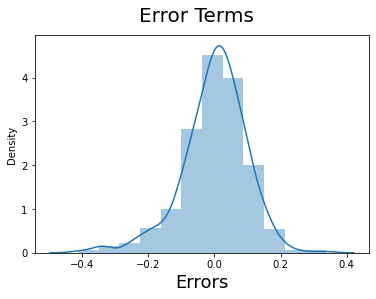

In [405]:
# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 12)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

### Making Predictions using the Final model lr7:

* Applying scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
* As we want to use the metrics that the model learned from the training data to be applied on the test data. 
* In other words, we want to prevent the information leak from train to test dataset.

In [406]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [407]:
df_test.head()

,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,season_winter,yr_1,mnth_Febraury,...,holiday_1,weekday_Monday,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,workingday_1,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
22,0.046591,0.025950,0.453529,0.462217,0.110907,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
468,0.543115,0.536771,0.522511,0.347424,0.855729,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
553,0.951196,0.933712,0.596104,0.212829,0.534975,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
504,0.699909,0.662746,0.551083,0.478229,0.817648,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
353,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0


In [408]:
df_test.describe()

,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,season_winter,yr_1,mnth_Febraury,...,holiday_1,weekday_Monday,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,workingday_1,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.551225,0.527528,0.662567,0.346706,0.518889,0.264840,0.246575,0.251142,0.493151,0.059361,...,0.041096,0.155251,0.146119,0.118721,0.173516,0.132420,0.127854,0.684932,0.324201,0.036530
std,0.229463,0.215434,0.143562,0.159553,0.219953,0.442259,0.432005,0.434663,0.501098,0.236840,...,0.198967,0.362974,0.354034,0.324202,0.379560,0.339723,0.334692,0.465607,0.469148,0.188034
min,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.356479,0.348019,0.553031,0.232689,0.364703,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.557653,0.549198,0.662338,0.328208,0.525771,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.751309,0.709163,0.762338,0.435708,0.676887,1.000000,0.000000,0.500000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Division into X_test, y_test:

In [409]:
y_test = df_test.pop('cnt') #Popping out the target variable "cnt"
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   temp                            219 non-null    float64
 1   atemp                           219 non-null    float64
 2   hum                             219 non-null    float64
 3   windspeed                       219 non-null    float64
 4   season_summer                   219 non-null    uint8  
 5   season_fall                     219 non-null    uint8  
 6   season_winter                   219 non-null    uint8  
 7   yr_1                            219 non-null    uint8  
 8   mnth_Febraury                   219 non-null    uint8  
 9   mnth_March                      219 non-null    uint8  
 10  mnth_April                      219 non-null    uint8  
 11  mnth_May                        219 non-null    uint8  
 12  mnth_June                       219

In [410]:
X_test.shape

(219, 29)

In [411]:
y_test.shape

(219,)

In [412]:
# Adding constant variable to test dataframe
X_test_m = sm.add_constant(X_test)

In [413]:
X_train.columns

Index(['temp', 'season_summer', 'season_winter', 'yr_1', 'mnth_September',
       'weekday_Saturday', 'weathersit_Mist_Cloudy',
       'weathersit_LightSnow_LightRain'],
      dtype='object')

In [414]:
X_test_m.columns

Index(['const', 'temp', 'atemp', 'hum', 'windspeed', 'season_summer',
       'season_fall', 'season_winter', 'yr_1', 'mnth_Febraury', 'mnth_March',
       'mnth_April', 'mnth_May', 'mnth_June', 'mnth_July', 'mnth_August',
       'mnth_September', 'mnth_October', 'mnth_November', 'mnth_December',
       'holiday_1', 'weekday_Monday', 'weekday_Tuesday', 'weekday_Wednesday',
       'weekday_Thursday', 'weekday_Friday', 'weekday_Saturday',
       'workingday_1', 'weathersit_Mist_Cloudy',
       'weathersit_LightSnow_LightRain'],
      dtype='object')

In [415]:
# Final columns for prediction
cols = ['temp', 'season_summer', 'season_winter', 'yr_1', 'mnth_September',
       'weekday_Saturday', 'weathersit_Mist_Cloudy',
       'weathersit_LightSnow_LightRain']

In [416]:
drop_cols = [ 'atemp', 'hum', 'windspeed',
       'season_fall', 'mnth_Febraury', 'mnth_March',
       'mnth_April', 'mnth_May', 'mnth_June', 'mnth_July', 'mnth_August',
        'mnth_October', 'mnth_November', 'mnth_December',
       'holiday_1', 'weekday_Monday', 'weekday_Tuesday', 'weekday_Wednesday',
       'weekday_Thursday', 'weekday_Friday', 
       'workingday_1']
X_test_m = X_test_m.drop(drop_cols, axis = 1)


In [417]:
#predicting the values for test dataset
y_pred_m = lr7.predict(X_test_m)

### Model Evaluation:

### Homoscedasticity:

### Plotting the graph for actual versus predicted values:

Text(0, 0.5, 'y_pred')

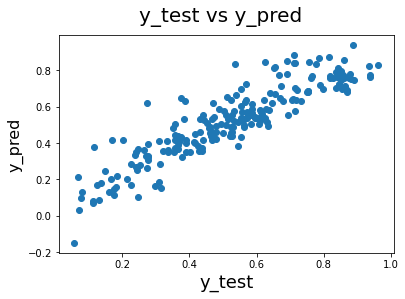

In [418]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_m)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

### R-squared Score:

In [419]:
print('Train R-Score: ' ,r2_score(y_train,y_train_pred))  # R score for train data
print('Test R-Score: ' ,r2_score(y_test, y_pred_m))       # R score for test data

Train R-Score:  0.8075615756392629
Test R-Score:  0.8103175263137805


### Adjusted R^2 Value for test dataset:

In [420]:
# shape of X_test
X_test.shape

(219, 29)

In [421]:
# Value of R2:
r2 = 0.8103175263137805

In [422]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print("Adjusted R2 :", adjusted_r2)

Adjusted R2 : 0.7812128081291225


## Conclusion:
    * Train R^2 :                0.808
    * Train Adjusted R^2 :       0.804
    * Test R^2 :                 0.810
    * Test Adjusted R^2 :        0.799
This seems to be a really good model that can very well 'Generalize' various datasets.

In [423]:
X_train.columns

Index(['temp', 'season_summer', 'season_winter', 'yr_1', 'mnth_September',
       'weekday_Saturday', 'weathersit_Mist_Cloudy',
       'weathersit_LightSnow_LightRain'],
      dtype='object')

### Significant values to predict the demand for shared bikes:
* temp
* season_summer 
* season_winter
* yr_1 (year 2019)
* mnth_September
* weekday_Saturday
* weathersit_Mist_Cloudy
* weathersit_LightSnow_LightRain

## Final Report:
As per our final Model - lr7, the top 3 predictor variables that influences the bike booking are:

* Temperature (temp): A coefficient value of ‘0.5636’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.585685 units.

* weathersit_Mist_Cloudy: A coefficient value of ‘-0.070643’ indicated that, w.r.t Weathersit_Clear_FewClouds, a unit increase in weathersit_Mist_Cloudy variable, decreases the bike hire numbers by 0.070643 units.

* weathersit_LightSnow_LightRain: A coefficient value of ‘-0.318299’ indicated that, w.r.t weathersit_Clear_FewClouds, a unit increase in weathersit_LightSnow_LightRain, decreases the bike hire numbers by 0.318299 units.

* yr_1: A coefficient value of ‘0.228547’ indicated that a unit increase in yr_0 variable, increases the bike hire numbers by 0.228547 units.

- So, it's suggested to consider these variables utmost importance while planning, to achive maximum Booking

The next best features that can also be considered are:

* season_winter: A coefficient value of ‘0.137323’ indicated that w.r.t season_spring, a unit increase in season_winter variable increases the bike hire numbers by 0.137323 units.

* season_summer: A coefficient value of ‘0.078760’ indicated that w.r.t season_spring, a unit increase in season_summer variable decreases the bike hire numbers by 0.078760 units.